# Assignment 2, Due by 9am Sunday, 10 March 2024

### Name: -------           Student ID: ----------

1) [50 pts] Using the 'Buy iphone' dataset shown in the table below, build a decision tree using pen and paper (or any drawing tool). Show the steps of the algorithm and the final decision tree (Use either the Gini Impurity Index or the Entropy).
Submit a PDF file named `tree.pdf` having clear pictures of your decision tree constructions steps as well as the computation done for deciding the appropriate splits.

2) [5 pts] Then use the decision tree to predict the class of the following new instance: Age<=20, Income=Medium, Is_Student=Yes, Credit_Rating=Fair

| Age             | Income | Is_Student | Credit_Rating | Buy_iPhone |
| --------------- | ------ | ---------- | ------------- | ---------- |
| Less than 25    | High   | No         | Fair          | No         |
| Less than 25    | High   | No         | Excellent     | No         |
| 25 to 35        | High   | No         | Fair          | Yes        |
| Greater than 35 | Medium | No         | Fair          | Yes        |
| Greater than 35 | Low    | Yes        | Fair          | Yes        |
| Greater than 35 | Low    | Yes        | Excellent     | No         |
| 25 to 35        | Low    | Yes        | Excellent     | Yes        |
| Less than 25    | Medium | No         | Fair          | No         |
| Less than 25    | Low    | Yes        | Fair          | Yes        |
| Greater than 35 | Medium | Yes        | Fair          | Yes        |
| Less than 25    | Medium | Yes        | Excellent     | Yes        |
| 25 to 35        | Medium | No         | Excellent     | Yes        |
| 25 to 35        | High   | Yes        | Fair          | Yes        |
| Greater than 35 | Medium | No         | Excellent     | No         |

In [3]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier

from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score

import matplotlib.pyplot as plt

2) [Total 13 pts] 
- [1 pt] Load the `dataset.csv` (available on the same folder as this notebook) into a Pandas frame. Display the first 5 rows of the dataset.
- [12 pts] Preprocess the dataset by encoding the categorical variables using the `LabelEncoder` for the target variable and the `OneHotEncoder` for the features.
- Display the first 5 rows of the dataset after the preprocessing.

In [4]:
#Load the dataset
data =pd.read_csv('dataset.csv' )
print(data.head())
X,y =data.iloc[:,:-1] , data['Buy_iPhone']
print(X.head())
print('***************')
print(y.head())

               Age  Income Is_Student Credit_Rating Buy_iPhone
0    Less than 25     High         No          Fair         No
1    Less than 25     High         No     Excellent         No
2         25 to 35    High         No          Fair        Yes
3  Greater than 35  Medium         No          Fair        Yes
4  Greater than 35     Low        Yes          Fair        Yes
               Age  Income Is_Student Credit_Rating
0    Less than 25     High         No          Fair
1    Less than 25     High         No     Excellent
2         25 to 35    High         No          Fair
3  Greater than 35  Medium         No          Fair
4  Greater than 35     Low        Yes          Fair
***************
0     No
1     No
2    Yes
3    Yes
4    Yes
Name: Buy_iPhone, dtype: object


In [8]:
#Preprocess the dataset 
print(X['Age'].unique())
print(X['Income'].unique())
print(X['Is_Student'].unique())
print(X['Credit_Rating'].unique())

['Less than 25' '25 to 35' 'Greater than 35']
[2 1 0]
[0]
['Fair' 'Excellent']


In [7]:
X = X.replace({
    'Is_Student':{'No':0,'Yes':0},
    'Income':{'Low':0,'Medium':1 , 'High':2},
             'Age':{'Less than 25 ':'Less than 25'}
})
X.head()

,Age,Income,Is_Student,Credit_Rating
0,Less than 25,2,0,Fair
1,Less than 25,2,0,Excellent
2,25 to 35,2,0,Fair
3,Greater than 35,1,0,Fair
4,Greater than 35,0,0,Fair


In [9]:
y= LabelEncoder().fit_transform(y) 
print(y)
X = pd.get_dummies(X)
X.head(5)

[0 0 1 1 1 0 1 0 1 1 1 1 1 0 1 1 0 0 1 1 0 1 1 0 1 1 0 0 1 1 1 1 0 1 0 1 1
 1 0 1 0 1 0 1 0 0 1 1 1 0 0 0 1 1 0 1 1 1 1 0 1 1 0]


,Income,Is_Student,Age_25 to 35,Age_Greater than 35,Age_Less than 25,Credit_Rating_Excellent,Credit_Rating_Fair
0,2,0,0,0,1,0,1
1,2,0,0,0,1,1,0
2,2,0,1,0,0,0,1
3,1,0,0,1,0,0,1
4,0,0,0,1,0,0,1


2) [Total 13 pts]
- [3 pts] Split the dataset into 80% training set and 20% testing sets. 
- [3 pts] Train the model using the training set. 
- [3 pts] Plot the decision tree.
- [4 pts] Report the training accuracy and the testing accuracy of the trained decision tree.



In [10]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(x_train.shape)
print(x_test.shape)

(50, 7)
(13, 7)


In [11]:
Tree_model = DecisionTreeClassifier(random_state = 0, max_depth=6)
Tree_model.fit(x_train, y_train)
val = Tree_model.predict(x_train)
predictions = Tree_model.predict(x_test)

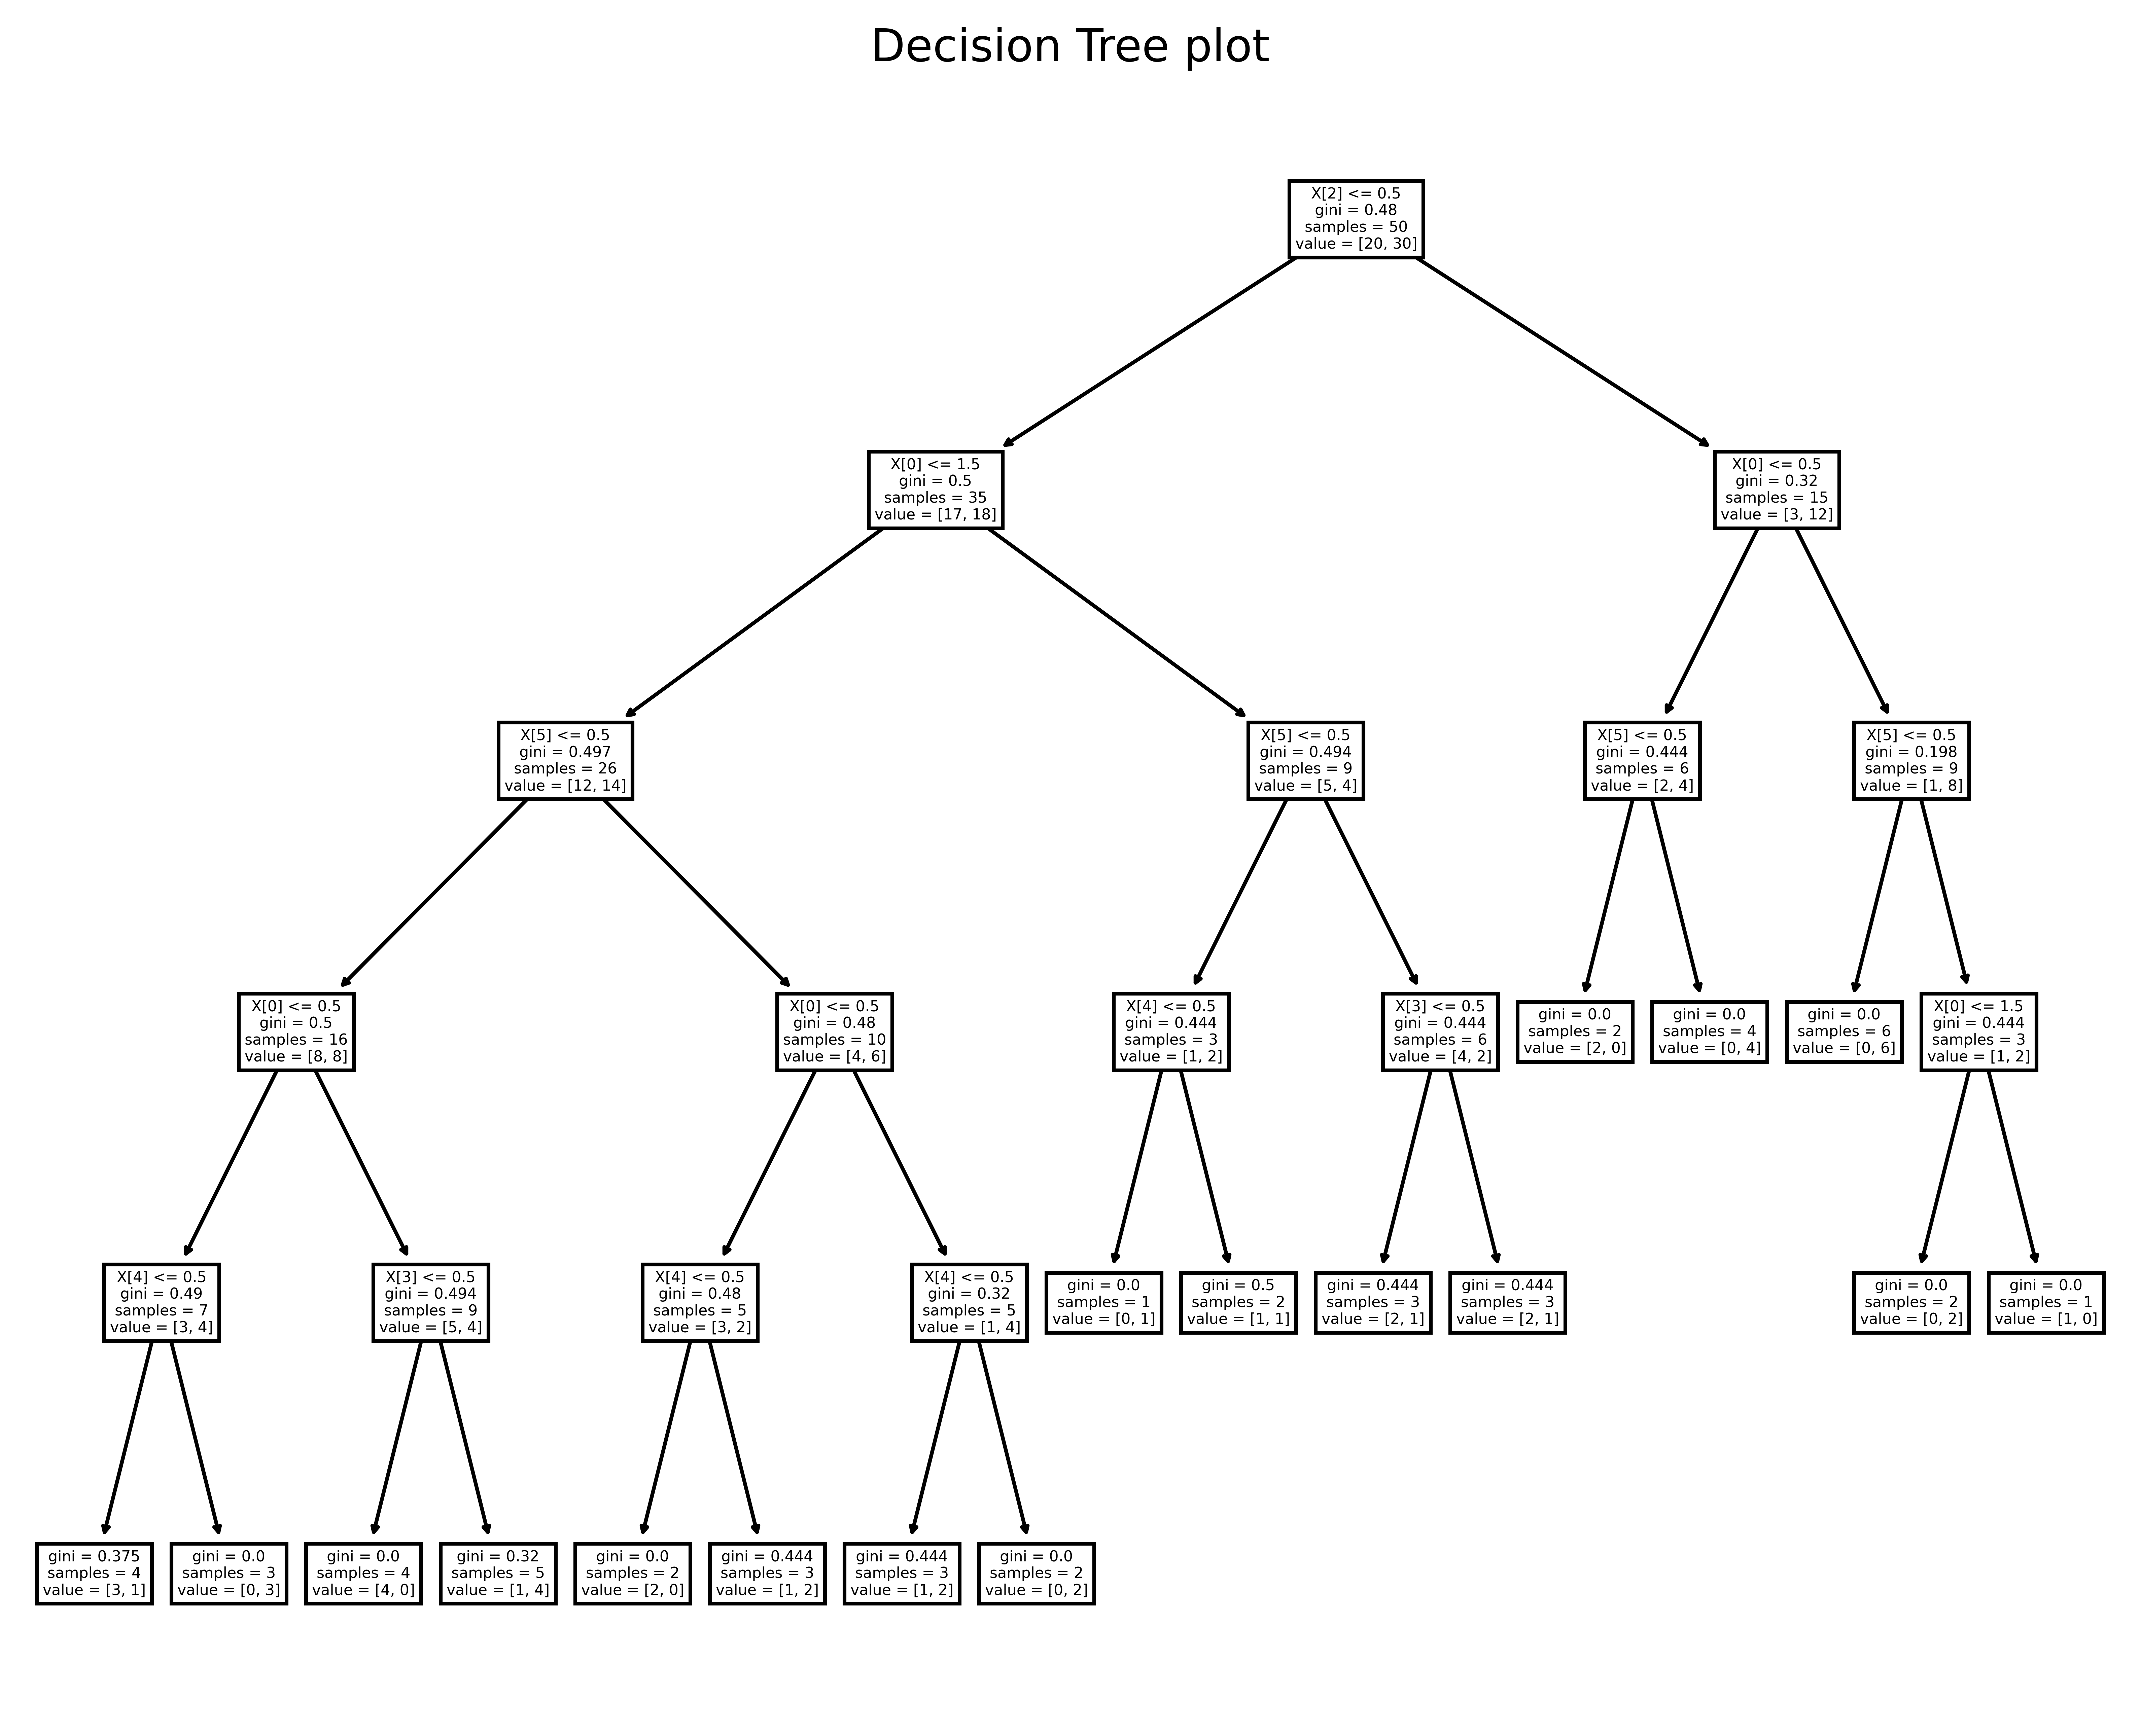

In [12]:
plt.rcParams.update({'font.size': 10})
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (10,8), dpi=800)
plot_tree(Tree_model)
plt.title('Decision Tree plot')
plt.show()

In [13]:
# the training accuracy and the testing accuracy
print('training accuracy: ',accuracy_score(y_train,val))
print('testing accuracy: ',accuracy_score(y_test,predictions))

training accuracy:  0.86
testing accuracy:  0.7692307692307693


3) [Total 9 pts] Evaluate the model using the testing set:
- [3 pts] Display the confusion matrix. 
- [2 pts] Display the classification report.
- [4 pts] Add some intrepretation and insights about the model performance.

In [18]:
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[3 1]
 [2 7]]
              precision    recall  f1-score   support

           0       0.60      0.75      0.67         4
           1       0.88      0.78      0.82         9

    accuracy                           0.77        13
   macro avg       0.74      0.76      0.75        13
weighted avg       0.79      0.77      0.78        13



confusion matrix :
    TP: 3    FP: 1
    FN: 2    TN: 7
    
classification_report
precision = TP/(TP+TN)
recall =TP/(TP+pN)
f1-score  =2*(precision*recall)/(precision+recall)

3) [Total 10 pts] 
- [4 pts] Train a random forest model using the training set and evaluate it using the testing set. Fine-tune the number of trees used and the max_samples (try different numbers) and select the value that yield the best accuracy. Only include the best parameters in the final submittion.
- [3 pts] Report the accuracies for the 5-fold cross validation (use cv=5) including the mean and standard deviation.
- [3 pts] Compare the performance of the decision tree and the random forest model. Include some intrepretation and insights.

In [39]:
Forest_model = RandomForestClassifier(random_state = 0, max_depth=5,max_samples=3,n_estimators=100)
Forest_model.fit(x_train, y_train)
Fval = Forest_model.predict(x_train)
Fpredictions = Forest_model.predict(x_test)

In [40]:
print('training accuracy: ',accuracy_score(y_train,Fval))
print('testing accuracy: ',accuracy_score(y_test,Fpredictions))

training accuracy:  0.62
testing accuracy:  0.6923076923076923


In [41]:
scores = cross_val_score(Forest_model, X, y, cv=5)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.65 accuracy with a standard deviation of 0.06


Decision Ttree 
     training accuracy:  0.86
    testing accuracy:  0.7692307692307693
Random Forest 
    training accuracy:  0.62
testing accuracy:  0.6923076923076923
     cross_val_score
         accuracy: 0.65 

- Submit to your GitHub repository (1) the PDF file named `tree.pdf` and (2) this Jupyter Notebook including your implementation code and the execution results.